## What is "man flu"?
Harvard Medical School on an article published on https://www.health.harvard.edu/blog/man-flu-really-thing-2018010413033 describes "man flu" as: "a constitutional character flaw of men who, when felled by a cold or flu, embellish the severity of their symptoms, quickly adopt a helpless “patient role,” and rely heavily on others to help them until they recover."

Dr Kyle Sue, a clinical assistant professor at Memorial University in his research showed that influenza results in higher risk of hospital admissions and deaths in men compared to women. This could be the result of high testosterone  in men that supresses their immune system. (https://www.independent.co.uk/life-style/health-and-families/man-flu-colds-women-gender-scientists-immune-system-caveman-testosterone-a8105006.html)

## Data

I created an <b>artificial dataset</b> to discuss whether there is a meaningful difference between men and women with respect to perceived illness symptoms (whether patients need to stay in bed as a result of flu). The purpose of this project is to discuss Chi-Squared hypothesis testing using Python. I used this subject and <b> created the artificial man flu dataset</b> only because I found the term funny. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Loading the artificial dataset
df = pd.read_csv('ManFlu.csv')
df=df[['BedRest', 'Sex']]
df.head()

,BedRest,Sex
0,No,Female
1,No,Female
2,No,Female
3,No,Female
4,No,Male


# What statistical test should we use?

The chi-square test of independence is used when we have two categorical variables and we want to see whether one group is different for different values of the other group.  

## Hypotheses
Null hypotheses: The two categorical variables are independent (no association between gender and the need to stay in bed)

Alternative hypotheses: The two categorical variables are dependent (there is an association between gender and the need to stay in bed)

In [15]:
# The number of observations in each group
df.groupby('Sex')['Sex'].count() # Counts the number of male/females

Sex
Female    713
Male      312
Name: Sex, dtype: int64

In [31]:
# Creating a contingency table
contingency_table = pd.crosstab(df.BedRest, df.Sex)
print (contingency_table)

Sex      Female  Male
BedRest              
No          413    86
Yes         300   226


In [17]:
# Calculate the proportions
proportions = pd.crosstab(df['Sex'],
   df['BedRest']).apply(lambda row: row/row.sum(),axis=1).transpose()

# Formatting table output to show only three decimals
pd.options.display.float_format = '{:,.3f}'.format
proportions.apply(lambda x: x.astype(int) if np.allclose(x, x.astype(int)) else x)
print (proportions)

Sex      Female  Male
BedRest              
No        0.579 0.276
Yes       0.421 0.724


In [32]:
# Calculate degree of freedom, chi-square, and p-value
# USING bioinfokit.analys library 

from bioinfokit.analys import stat
res = stat()
res.chisq(df=contingency_table)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       78.8631  6.65682e-19
Log-likelihood     1       81.1123  2.13252e-19



In [19]:
# Calculate degree of freedom, chi-square, and p-value
# USING scipy.stats library

from scipy.stats import chi2_contingency
Chi_square, p_value, Df, expected = chi2_contingency(contingency_table)
print ('Chi_square:', Chi_square, '\nDf:', Df, '\np_value:', p_value)

Chi_square: 78.86305133922971 
Df: 1 
p_value: 6.656820681726483e-19


In [21]:
# The expected values from chi-squared distribution

print(res.expected_df)


Expected frequency counts

      Female     Male
--  --------  -------
 0   347.109  151.891
 1   365.891  160.109



## Interpretation

### Question-1 :
#### Is there a difference between the groups? Can we reject the null-hypothesis? (Significance Testing)

Based on expected frequency table, it is expected that 160 men require bed rest when hit with flu. Our observed values show that 226 men reported that they needed a bed rest. In females, it is expected that 365 patients require bed rest, but only 300 female patients reported bed rest. So are the groups really different?

The p-value of p <0.05 obtained from chi-square test shows that the difference between male and female is significant. We reject the null hypothesis and conclude that there is an association between gender with whether or not patients need bed rest.



In [33]:
# interpret p-value

alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


### Question-2: 
#### How large is the difference? (Confidence Interval Estimation)
Confidence interval estimation contains the result of significance testing, and will help determine the size of the difference. In this example, whether the difference between male and female groups large enough to be called a "man flu"? 

In [34]:
# Proportion of females with who need bedrest 
p_fm = proportions['Female'][1]

# Size of female population
n_fm = df.groupby('Sex')['Sex'].count()['Female']

# Calculate the standard error for female population
se_female = np.sqrt(p_fm * (1 - p_fm) / n_fm)

# Calculate the Margin of Error for a Sample Proportion for females

z_score = 1.96
lcb_fm = p_fm - z_score* se_female #lower limit of the CI
ucb_fm = p_fm + z_score* se_female #upper limit of the CI

print (lcb_fm, ucb_fm)

0.3845199298886166 0.45699479661909725


In [35]:
# ANOTHER WAY TO CALCULATE THE MARGIN OF ERROR FOR FEMALE PROPORTION
# Calculating lower confidence and upper confidence for females
import statsmodels.api as sm
lcb_fm, ucb_fm = sm.stats.proportion_confint(n_fm * p_fm, n_fm)  
print (lcb_fm, ucb_fm)

0.3845205957599584 0.45699413074775547


In [25]:
# Proportion of males with desease 
p_m = proportions['Male'][1]

# Size of male population
n_m = df.groupby('Sex')['Sex'].count()['Male']

#Standard error for male poulation
se_male = np.sqrt(p_m * (1 - p_m) / n_m)

# Calculating lower confidence and upper confidence for males
import statsmodels.api as sm
lcb_m, ucb_m = sm.stats.proportion_confint(n_m * p_m, n_m)  
print (lcb_m, ucb_m)

0.6747774762140357 0.773940472503913


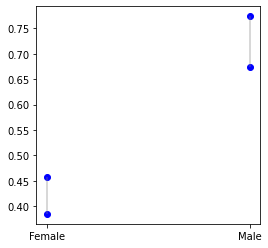

In [26]:
# Plotting Upper and Lower Confidence Intervals
plt.figure(figsize=(4,4))

dict={'Sex' : ['Female', 'Male'], 'LC':[lcb_fm,lcb_m], 'UC':[ucb_fm,ucb_m]}
tb3=pd.DataFrame(dict,columns=['Sex','LC', 'UC'])
tb3

ordered_df = tb3.sort_values(by='Sex')

plt.vlines(x=tb3.Sex, ymin=ordered_df['LC'], ymax=ordered_df['UC'], color='grey', alpha=0.4)
plt.scatter(tb3.Sex, ordered_df['LC'],  color='blue', alpha=1, label='LC')
plt.scatter(tb3.Sex, ordered_df['UC'],  color='blue', alpha=1 , label='UC')
plt.show()